# Perform clustering (Hierarchical,K means & DBSCAN) for the airlines data to obtain optimum number of clusters. 
* Draw the inferences from the clusters obtained.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA 

In [3]:
data.shape

(3999, 12)

In [4]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [5]:
#Renaming the column_name
data.rename(columns={"Award?": "Award"}, inplace=True)

In [6]:
data.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

In [7]:
#Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
data.drop('ID#', axis=1, inplace=True)

In [9]:
#Summary of dataset
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
#Checking duplicate data
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [11]:
#dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(3998, 11)

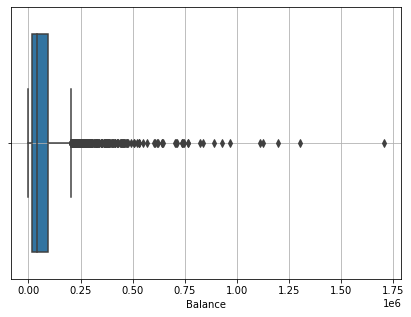

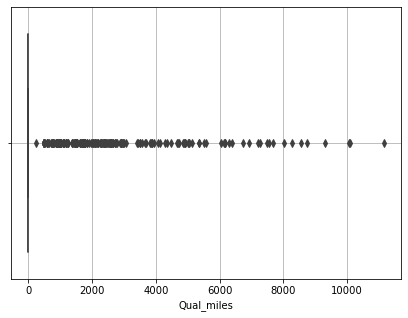

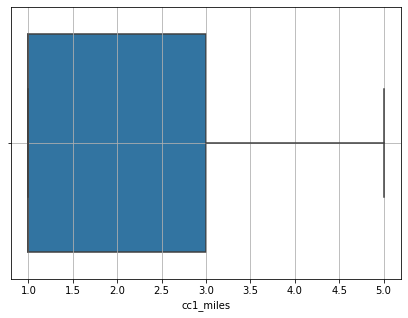

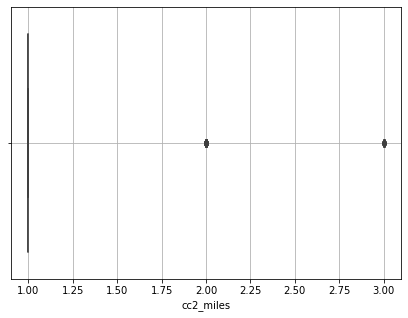

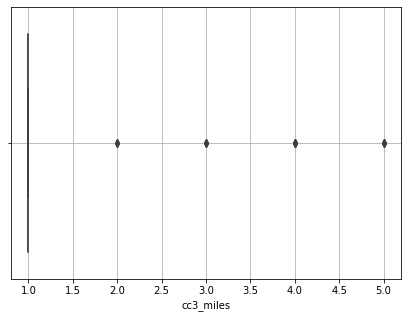

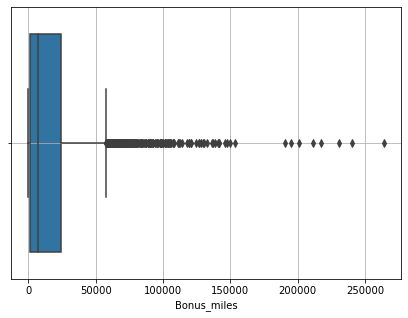

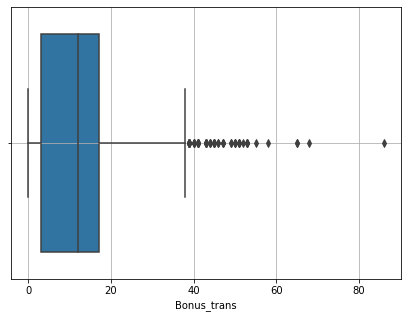

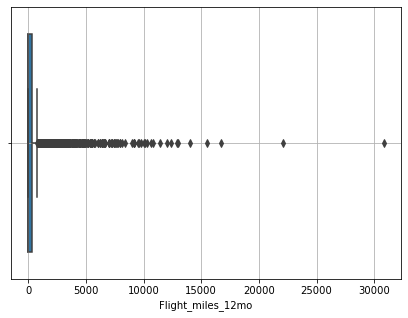

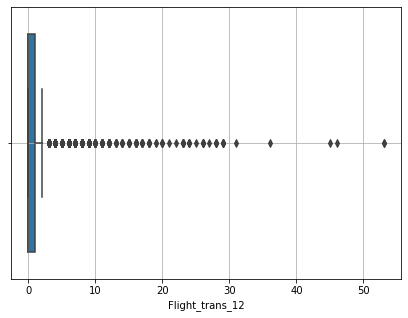

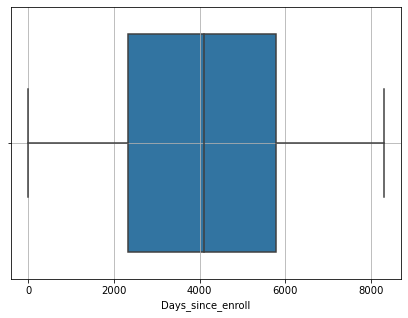

In [12]:
#Checking the outliers for all columns except Award
for i in data.columns[:-1]:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data[i])
    plt.grid()
    plt.show()

In [13]:
data.Qual_miles.value_counts()

0       3772
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual_miles, Length: 164, dtype: int64

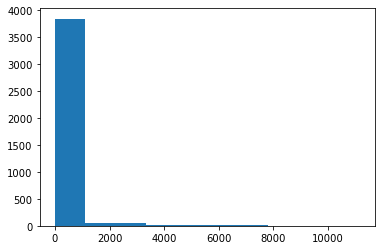

In [14]:
plt.hist(data.Qual_miles)
plt.show()

In [15]:
data.cc2_miles.value_counts()

1    3955
2      28
3      15
Name: cc2_miles, dtype: int64

In [16]:
data.cc3_miles.value_counts()

1    3980
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [17]:
data.Flight_miles_12mo.value_counts()

0        2722
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: Flight_miles_12mo, Length: 343, dtype: int64

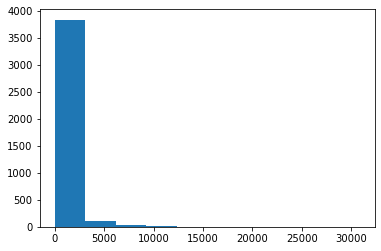

In [18]:
plt.hist(data.Flight_miles_12mo)
plt.show()

In [19]:
data.Flight_trans_12.value_counts()

0     2722
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: Flight_trans_12, dtype: int64

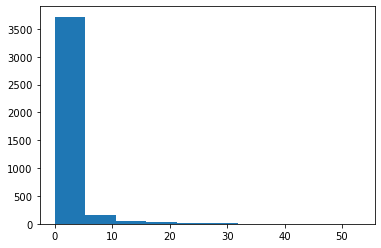

In [20]:
plt.hist(data.Flight_trans_12)
plt.show()

In [21]:
data.Bonus_miles.value_counts()

0        474
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: Bonus_miles, Length: 2734, dtype: int64

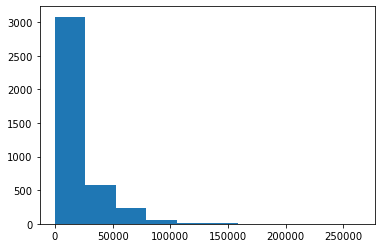

In [22]:
plt.hist(data.Bonus_miles)
plt.show()

In [23]:
data.Bonus_trans.value_counts()

0     474
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63
24     41
26     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
46      2
65      2
49      2
55      1
52      1
58      1
86      1
68      1
Name: Bonus_trans, dtype: int64

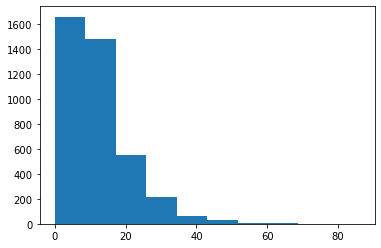

In [24]:
plt.hist(data.Bonus_trans)
plt.show()

#### Now in order to deal with the outliers we can use one of "3R Techniques" :

* Rectify/Impute
* Retain
* Remove


*In our example we choose to keep or retain the data, so we will use the Winsorization technique. This technique helps modify the sample distribution of random variables by removing the outliers and replacing them with the values that constitute the nth percentile and nth percentile values, e.g., all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 95th percentile, with the 95th percentile value.*

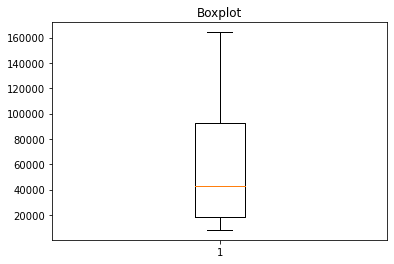

In [25]:
#Balance
data['Balance'] = winsorize(data.Balance, limits=[0.1, 0.1])  

plt.boxplot(data['Balance'])
plt.title('Boxplot')
plt.show()

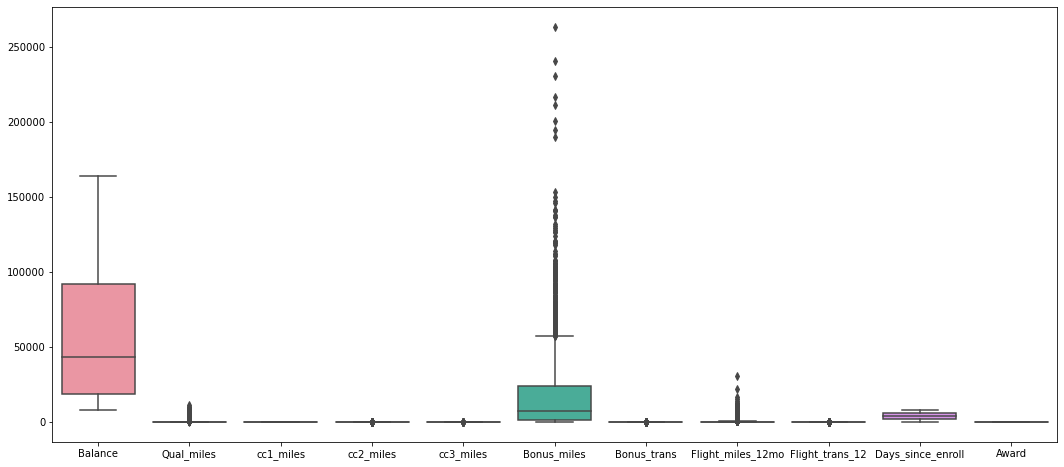

In [26]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data)
plt.show()

In [27]:
data.shape

(3998, 11)

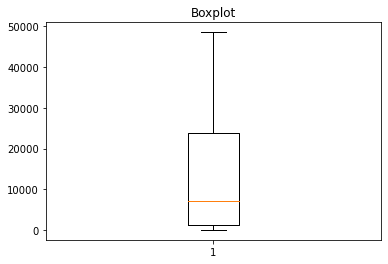

In [28]:
#Bonus_Miles
data['Bonus_miles'] = winsorize(data.Bonus_miles, limits=[0.1, 0.1])  

plt.boxplot(data['Bonus_miles'])
plt.title('Boxplot')
plt.show()

<AxesSubplot:>

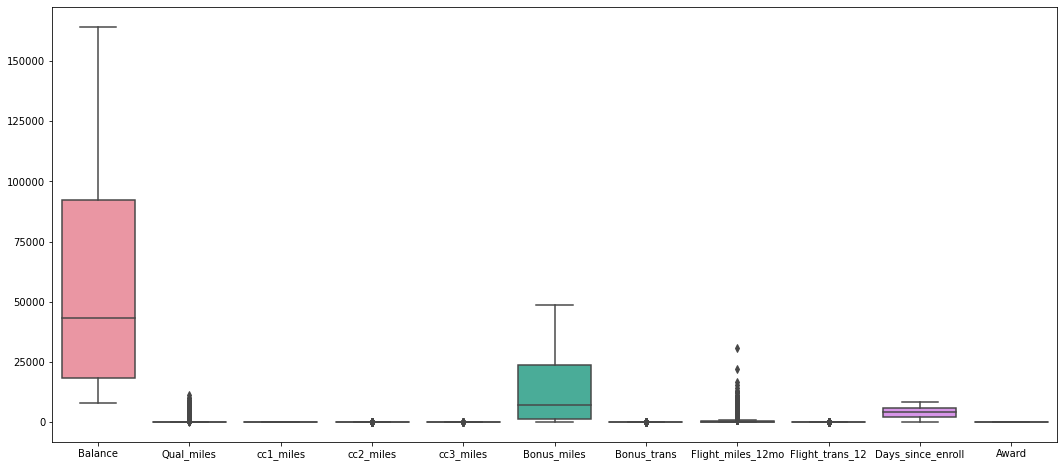

In [29]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data)

In [30]:
data.shape

(3998, 11)

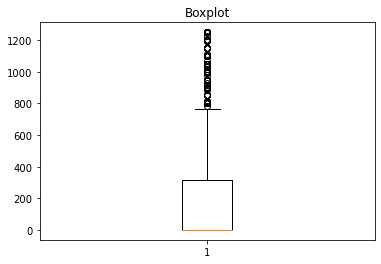

In [31]:
#Flight_Miles
data['Flight_miles_12mo'] = winsorize(data.Flight_miles_12mo, limits=[0.1,0.1])  

plt.boxplot(data['Flight_miles_12mo'])
plt.title('Boxplot')
plt.show()

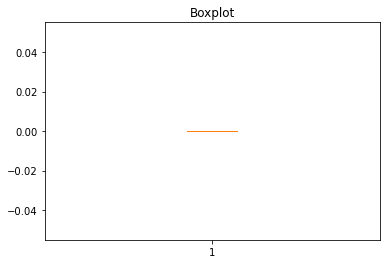

In [32]:
#Qual_Miles
data['Qual_miles'] = winsorize(data.Qual_miles, limits=[0.1,0.1])  

plt.boxplot(data['Qual_miles'])
plt.title('Boxplot')
plt.show()

<AxesSubplot:>

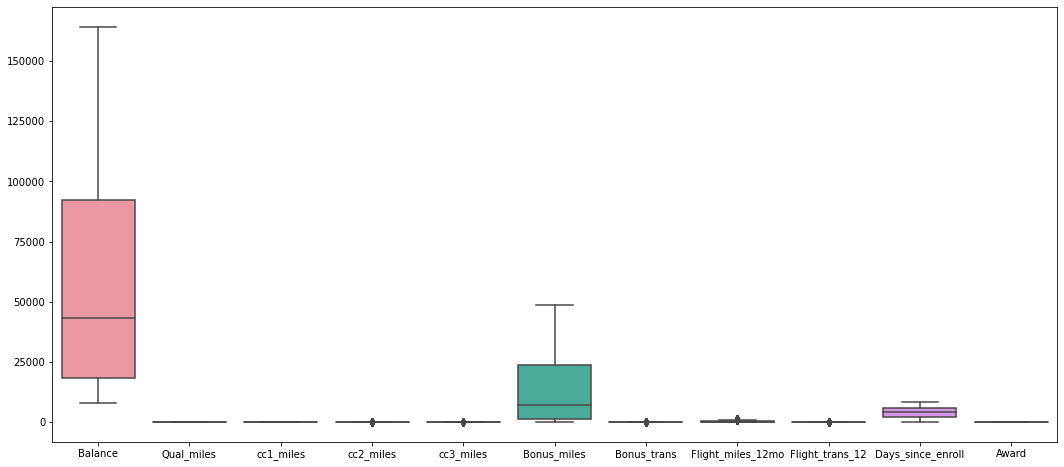

In [33]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data)

#### Now, it seems we have removed the extreme outliers from dataset.

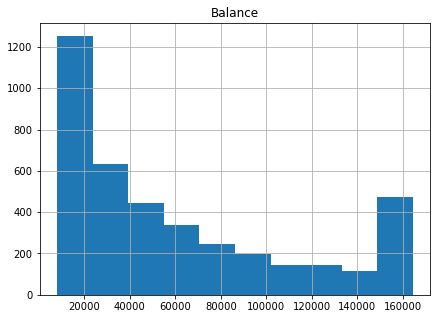

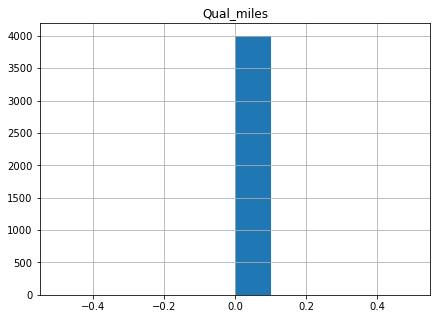

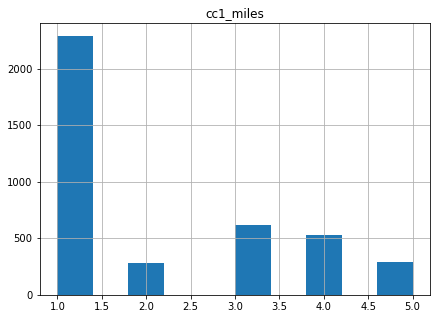

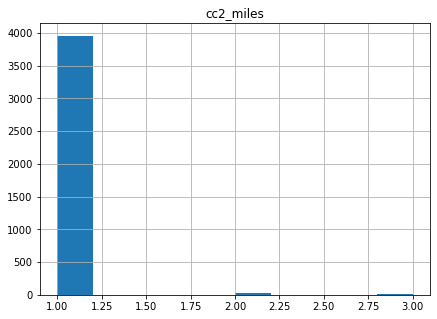

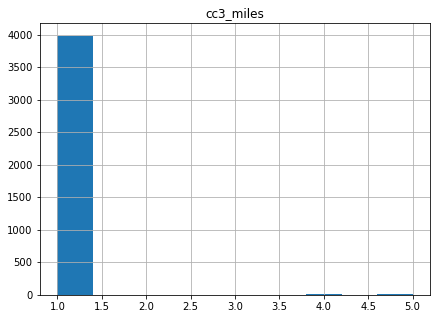

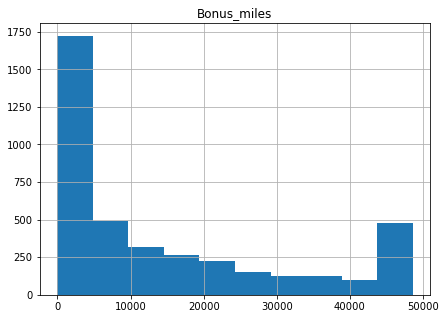

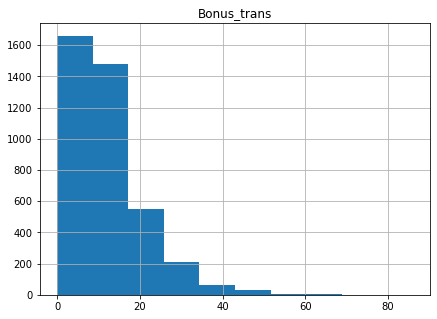

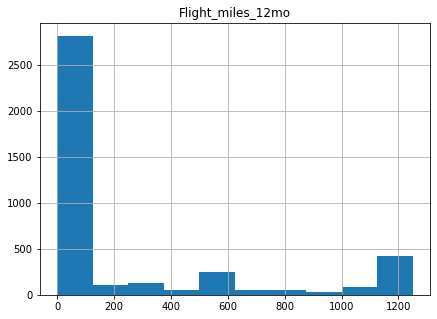

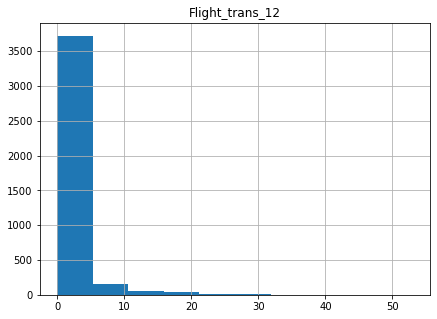

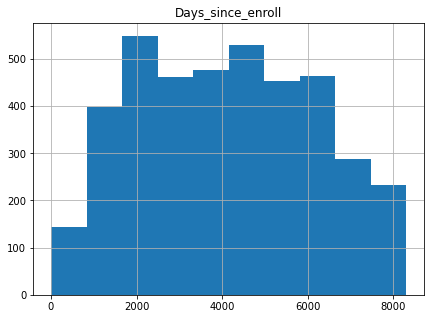

In [34]:
#Checking the distribution of dataset
for i in data.columns[:-1]:
    plt.figure(figsize = (7, 5))
    plt.hist(data[i])
    plt.title(i)
    plt.grid()
    plt.show()

In [35]:
# Now we check the data for zero variance values
(data==0).all()

Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award                False
dtype: bool

In [36]:
data.Qual_miles.value_counts()

0    3998
Name: Qual_miles, dtype: int64

In [37]:
#We drop the features that have zero variance values
data1 = data.drop('Qual_miles', axis=1)
data1.shape

(3998, 10)

## Feature Scaling 

In [38]:
data_norm = StandardScaler()

In [39]:
data_norm = data_norm.fit_transform(data1.iloc[:, :-1])

In [40]:
data_norm.shape

(3998, 9)

## Model Building using below 3 clustering techniques
* Hierarchial
* K-Means
* DBSCAN

### Hierarchical Clustering

#### Dendogram Visualisation

In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this 

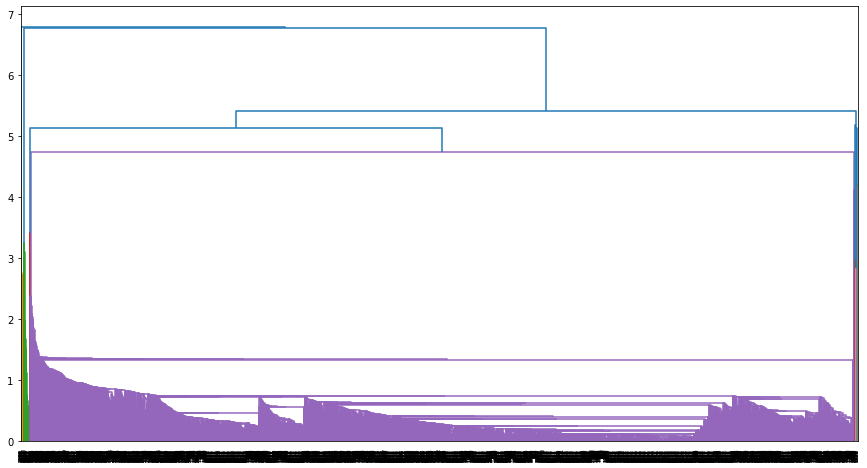

In [41]:
# create dendrogram with single method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

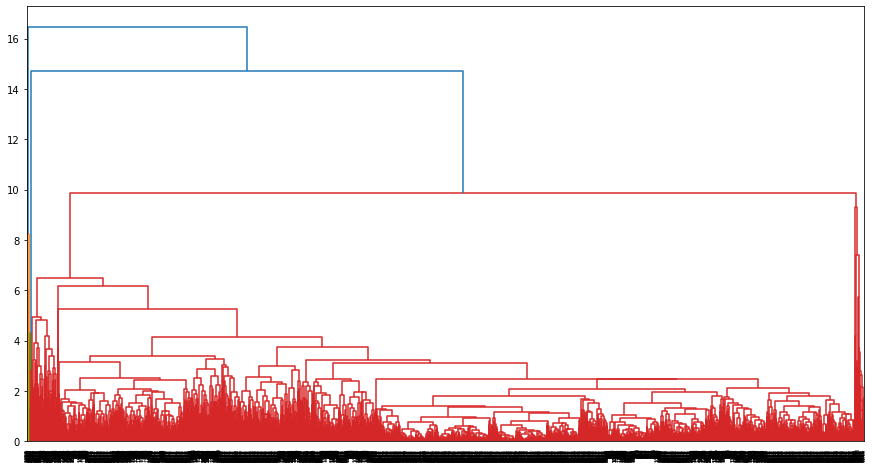

In [42]:
# create dendrogram with average method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

In [43]:
# create dendrogram with ward method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='ward'))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023FD64B9CA0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# create dendrogram with complete method
plt.figure(figsize=(13,5))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

### We'll choose ward method for hierarchial clustering since, it has properly distributed into groups for our dataset 

## Model Builing and Model Training 

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

## Predicting the model

In [ ]:
y_hc = hc.fit_predict(data_norm)
y_hc

In [ ]:
#Making clusters starting with no.1
data2 = data1.copy()
data2['Clusters'] = y_hc+1
data2

In [ ]:
#No. of states in cluster 1
data2[data2['Clusters']==1]

In [ ]:
#No. of states in cluster 2
data2[data2['Clusters']==2]

In [ ]:
#No. of states in cluster 3
data2[data2['Clusters']==3]

In [ ]:
#No. of states in cluster 4
data2[data2['Clusters']==4]

In [ ]:
#No. of clusters and its distribution
data2.Clusters.value_counts()

In [ ]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data2.Clusters.value_counts(), autopct='%0.f%%', labels=[2,1,3,4], explode=(0.1,0,0,0.05))
plt.title('Clusters')
plt.show()

In [ ]:
#Visualizing the cluster
plt.figure(figsize=(10,12))
scatter = plt.scatter(data2['Clusters'],data2['Balance'], c=data2['Clusters'], cmap=plt.cm.Accent)
plt.legend(*scatter.legend_elements())
plt.show()

In [ ]:
#Summarizing the cluster
data2.groupby('Clusters').agg(['mean']).reset_index()

### Conclusion: 
* From above Hierarchical clustering we can say that cluster no.1 are the frequent fliers as the cc1_miles is high, cluster no.4 are the least flier passengers. 
* Cluster no.3 are the 2nd most frequent fliers & Cluster no.2 are the 3rd most frequent fliers.

### K-Means

### Elbow Method

In [ ]:
#We will determine the Optimum no.of clusters using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    kmeans.fit_predict(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score

In [ ]:
silhouette_score(data_norm, kmeans.labels_)

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(data_norm)
    db_index = silhouette_score(data_norm, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Index")
plt.title('Silhouette Analysis')
plt.show()

### Calinski Harabasz Score

In [ ]:
calinski_harabasz_score(data_norm, kmeans.labels_)

In [ ]:
#We will determine the Optimum no.of clusters using calinski_harabasz_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(data_norm)
    db_index = calinski_harabasz_score(data_norm, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title('Calinski-Harabasz Analysis')
plt.show()

### From above 3 methods, we can go ahead with no. of clusters = 5 as the Silhouette score and Elbow method wcss are high.

## Model Building & Training

In [ ]:
kmeans1 = KMeans(n_clusters=5, random_state=0, max_iter=500)

## Model Prediction

In [ ]:
y_km = kmeans1.fit_predict(data_norm)
y_km

In [ ]:
#Making clusters starting with no.1
data3 = data1.copy()
data3['Clusters'] = y_km+1
data3

In [ ]:
#No. of states in cluster 1
data3[data3['Clusters']==1]

In [ ]:
#No. of states in cluster 2
data3[data3['Clusters']==2]

In [ ]:
#No. of states in cluster 3
data3[data3['Clusters']==3]

In [ ]:
#No. of states in cluster 4
data3[data3['Clusters']==4]

In [ ]:
#No. of states in cluster 5
data3[data3['Clusters']==5]

In [ ]:
#No. of clusters and its distribution
data3.Clusters.value_counts()

In [ ]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data3.Clusters.value_counts(), autopct='%0.1f%%', labels=[1,2,3,4,5], explode=(0.1,0.05,0,0,1))
plt.title('Clusters')
plt.show()

In [ ]:
#Visualizing the cluster
plt.figure(figsize=(10,12))
scatter = plt.scatter(data3['Clusters'],data3['Balance'], c=data3['Clusters'], cmap=plt.cm.Accent)
plt.legend(*scatter.legend_elements())
plt.show()

In [ ]:
#Summarizing the cluster
data3.groupby('Clusters').agg(['mean']).reset_index()

### Conclusion: 
* From above K-Means clustering we can say that cluster no.2, cluster no.5 and cluster no.3 are the top 3 frequent fliers. 
* Cluster no.1 & Cluster no.4 are the least fliers.

## DBSCAN

### Model Builing and Model Training

In [ ]:
db_mod = DBSCAN(eps=0.5, min_samples=5)
db_mod.fit(data_norm)

### Model Evaluation

In [ ]:
#Noisy samples are given the label -1 which are outliers.
db_mod.labels_

In [ ]:
np.unique(db_mod.labels_)

### We will try to tweak hyper-parameters such  as eps & min samples for DBSCAN

### Model Building

In [ ]:
db_mod2 = DBSCAN(eps=6, min_samples=9)

### Model Training & Evaluation 

In [ ]:
db_mod2.fit(data_norm)

## Model Prediction

In [ ]:
y_db = db_mod2.fit_predict(data_norm)
y_db

In [ ]:
db_mod2.labels_

In [ ]:
np.unique(db_mod2.labels_)

In [ ]:
#Making clusters starting with no.1
data4 = data1.copy()
data4['Clusters'] = y_db+1
data4

In [ ]:
#No. of states in cluster 1
data4[data4['Clusters']==1]

In [ ]:
#No. of states in cluster 2
data4[data4['Clusters']==2]

In [ ]:
#No. of states in cluster 3
data4[data4['Clusters']==3]

In [ ]:
#No. of clusters and its distribution
data4.Clusters.value_counts()

In [ ]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data4.Clusters.value_counts(), autopct='%0.1f%%', labels=[1,2,3], explode=(0,1.5,0.2))
plt.title('Clusters')
plt.show()

In [ ]:
#Visualizing the cluster
plt.figure(figsize=(10,12))
scatter = plt.scatter(data4['Clusters'],data4['Balance'], c=data4['Clusters'], cmap=plt.cm.Accent)
plt.legend(*scatter.legend_elements())
plt.show()

In [ ]:
#Summarizing the cluster
data4.groupby('Clusters').agg(['mean']).reset_index()

### Conclusion:
* From above DBSCAN clustering we can say that cluster no.1 are the most frequent fliers.
* Cluster no.2 & Cluster no.3 are the lowest fliers. 

### Final Inference:
**Hence, the K-Means model is far better than DBSCAN & Hierarchical clustering, as it had properly segregated into 5 groups with the help of 3 metrics and also the mean scores of 5 clusters are fairly differentiated among clusters.**

**We can finalise our K-Means model for the clustering the airlines_dataset.** 

### =====================================================================